# MMM Foundation - Ice Cream Company (CORRECTED & COMPLETE)

**Project**: Ice Cream Company Media Mix Modeling (MMM)  
**Dataset**: Complete Coverage (2022-2023, 10 channels, 104 weeks)  
**Goal**: Foundation MMM with proper variable classification and analysis

## üö® **CRITICAL CORRECTIONS MADE:**

### **1. Email Campaigns - Variable Type Error Fixed**
- **WRONG**: Treating `email_email_campaigns` as spend (ROI = $219 per "campaign")
- **CORRECT**: It's campaign COUNT, not cost - treat as activity variable
- **Impact**: No false ROI calculation for free marketing activity

### **2. Promotions - Control Variable Clarification**
- **WRONG**: Negative promotion effects seemed suspicious
- **CORRECT**: Promotions are control variables, not media channels
- **Impact**: Proper attribution without promotion bias

### **3. Media Spend Focus**
- **FOCUS**: Only actual $ spend channels get ROI analysis
- **RESULT**: Clean, actionable ROI insights for budget decisions

## üìä **What This Foundation Provides:**
1. **Proper Variable Classification** - Spend vs Activity vs Control
2. **Clean ROI Analysis** - Only for actual spend channels
3. **Baseline Performance** - Understanding model limitations
4. **Business Insights** - Actionable recommendations
5. **Foundation for Enhancement** - Sets up advanced modeling

## ‚ö†Ô∏è **Expected Limitations:**
- **Low R¬≤** - Missing seasonality, adstock, external factors
- **Simple Linear Model** - No carryover or saturation effects
- **Foundation Only** - Needs enhancement for production use

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print("üéØ MMM FOUNDATION - ICE CREAM COMPANY (CORRECTED & COMPLETE)")
print("=" * 70)
print("üìä Proper Variable Classification & Clean ROI Analysis")
print("üéØ Goal: Foundation MMM with Accurate Attribution")
print("‚ö†Ô∏è  Expected: Low R¬≤ due to missing advanced features")

# Enhanced plotting settings
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10

üéØ MMM FOUNDATION - ICE CREAM COMPANY (CORRECTED & COMPLETE)
üìä Proper Variable Classification & Clean ROI Analysis
üéØ Goal: Foundation MMM with Accurate Attribution
‚ö†Ô∏è  Expected: Low R¬≤ due to missing advanced features


In [38]:
# Step 1: Load Complete Coverage Dataset
print(f"\nüìÅ LOADING COMPLETE COVERAGE DATASET")
print("=" * 40)

try:
    # Load the unified dataset
    df = pd.read_csv('../data/processed/unified_dataset_complete_coverage_2022_2023.csv')
    df['date'] = pd.to_datetime(df['date'])
    
    print(f"‚úÖ Successfully loaded Complete Coverage dataset")
    print(f"   Shape: {df.shape}")
    print(f"   Date range: {df['date'].min().date()} to {df['date'].max().date()}")
    print(f"   Total weeks: {len(df)}")
    
except FileNotFoundError:
    print("‚ùå Dataset not found! Please ensure unified_dataset_complete_coverage_2022_2023.csv exists")
    raise


üìÅ LOADING COMPLETE COVERAGE DATASET
‚úÖ Successfully loaded Complete Coverage dataset
   Shape: (104, 29)
   Date range: 2022-01-03 to 2023-12-25
   Total weeks: 104


In [39]:
# Step 2: Critical Variable Classification Analysis
print(f"\nüîç CRITICAL VARIABLE CLASSIFICATION ANALYSIS")
print("=" * 50)

# Sales column
sales_col = 'sales'
print(f"üìä Target Variable: {sales_col}")

print(f"\nüö® CRITICAL DISCOVERY - EMAIL CAMPAIGNS:")
print(f"   Variable: email_email_campaigns")
email_values = sorted(df['email_email_campaigns'].unique())
print(f"   Values: {email_values}")
print(f"   Average per week: {df['email_email_campaigns'].mean():.1f}")
print(f"   Max in a week: {df['email_email_campaigns'].max():.0f}")
print(f"   üéØ CONCLUSION: This is CAMPAIGN COUNT, not COST!")
print(f"   ‚ùå WRONG: Calculate ROI ($ sales per $ spent)")
print(f"   ‚úÖ CORRECT: Treat as activity variable (sales per campaign)")

print(f"\nüö® CRITICAL DISCOVERY - PROMOTIONS:")
print(f"   Variable: promo_promotion_type")
promo_weeks = df['promo_promotion_type'].notna().sum()
promo_types = sorted(df['promo_promotion_type'].dropna().unique())
print(f"   Promotion weeks: {promo_weeks}/104 ({promo_weeks/104*100:.1f}%)")
print(f"   Promotion types: {promo_types}")

# Analyze promotion impact
sales_with_promo = df[df['promo_promotion_type'].notna()]['sales'].mean()
sales_without_promo = df[df['promo_promotion_type'].isna()]['sales'].mean()
promo_effect = sales_with_promo - sales_without_promo

print(f"   Sales without promotions: {sales_without_promo:,.0f}")
print(f"   Sales with promotions: {sales_with_promo:,.0f}")
print(f"   Promotion effect: {promo_effect:+,.0f}")
print(f"   üéØ CONCLUSION: Promotions are CONTROL variables")
print(f"   ‚úÖ CORRECT: Control for promotion periods, not media ROI")

# MEDIA SPEND CHANNELS (actual $ spent - these get ROI analysis)
media_spend_cols = [
    'search_cost',
    'tv_branding_tv_branding_cost', 
    'social_costs',
    'ooh_ooh_spend',
    'radio_national_radio_national_cost',
    'radio_local_radio_local_cost',
    'tv_promo_tv_promo_cost'
    # NOTE: email_email_campaigns EXCLUDED - it's campaign count, not cost
]

# ACTIVITY/CONTROL VARIABLES (not spend, but affect sales)
activity_control_cols = [
    'email_email_campaigns',  # Number of email campaigns (activity)
    # Promotions will be added as dummies
]

# Verify columns exist in dataset
available_spend_cols = [col for col in media_spend_cols if col in df.columns]
available_activity_cols = [col for col in activity_control_cols if col in df.columns]

print(f"\nüí∞ MEDIA SPEND CHANNELS ({len(available_spend_cols)}) - FOR ROI ANALYSIS:")
for col in available_spend_cols:
    avg_spend = df[col].mean()
    total_spend = df[col].sum()
    print(f"   ‚úÖ {col}: ${avg_spend:,.0f} avg weekly (${total_spend:,.0f} total)")

print(f"\nüìä ACTIVITY/CONTROL VARIABLES ({len(available_activity_cols)}) - NOT FOR ROI:")
for col in available_activity_cols:
    avg_activity = df[col].mean()
    total_activity = df[col].sum()
    print(f"   üéØ {col}: {avg_activity:.1f} avg weekly ({total_activity:.0f} total campaigns)")


üîç CRITICAL VARIABLE CLASSIFICATION ANALYSIS
üìä Target Variable: sales

üö® CRITICAL DISCOVERY - EMAIL CAMPAIGNS:
   Variable: email_email_campaigns
   Values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
   Average per week: 1.5
   Max in a week: 4
   üéØ CONCLUSION: This is CAMPAIGN COUNT, not COST!
   ‚ùå WRONG: Calculate ROI ($ sales per $ spent)
   ‚úÖ CORRECT: Treat as activity variable (sales per campaign)

üö® CRITICAL DISCOVERY - PROMOTIONS:
   Variable: promo_promotion_type
   Promotion weeks: 30/104 (28.8%)
   Promotion types: [np.float64(1.0), np.float64(2.0), np.float64(3.0)]
   Sales without promotions: 136,794
   Sales with promotions: 134,356
   Promotion effect: -2,438
   üéØ CONCLUSION: Promotions are CONTROL variables
   ‚úÖ CORRECT: Control for promotion periods, not media ROI

üí∞ MEDIA SPEND CHANNELS (7) - FOR ROI ANALYSIS:
   ‚úÖ search_cost: $629 avg weekly ($65,458 total)
   ‚úÖ tv_branding_tv_branding_cost: $5,434 avg weekly ($56

In [40]:
# Step 3: Data Quality Assessment
print(f"\nüîß DATA QUALITY ASSESSMENT")
print("=" * 40)

# Check for missing values
print(f"üìä Missing Values Analysis:")
print(f"   Sales missing: {df[sales_col].isnull().sum()}")

missing_summary = []
for col in available_spend_cols + available_activity_cols:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    missing_summary.append((col, missing_count, missing_pct))
    print(f"   {col}: {missing_count} missing ({missing_pct:.1f}%)")

# Fill missing values appropriately
df_clean = df.copy()

# Fill spend columns with 0 (no spend when missing)
for col in available_spend_cols:
    df_clean[col] = df_clean[col].fillna(0)

# Fill activity columns with 0 (no activity when missing)
for col in available_activity_cols:
    df_clean[col] = df_clean[col].fillna(0)

print(f"\n‚úÖ Data Quality Summary:")
print(f"   Missing values filled with 0 (appropriate for spend/activity data)")
print(f"   Clean dataset ready for modeling")

# Basic statistics
print(f"\nüìà Sales Statistics:")
sales_stats = df_clean[sales_col].describe()
print(f"   Mean: {sales_stats['mean']:,.0f}")
print(f"   Std: {sales_stats['std']:,.0f}")
print(f"   Range: {sales_stats['min']:,.0f} - {sales_stats['max']:,.0f}")
print(f"   CV: {sales_stats['std']/sales_stats['mean']:.3f}")

print(f"\nüí∞ Media Spend Summary:")
if available_spend_cols:
    total_spend = df_clean[available_spend_cols].sum(axis=1)
    print(f"   Average weekly total spend: ${total_spend.mean():,.0f}")
    print(f"   Total period spend: ${total_spend.sum():,.0f}")
    print(f"   Spend range: ${total_spend.min():,.0f} - ${total_spend.max():,.0f}")


üîß DATA QUALITY ASSESSMENT
üìä Missing Values Analysis:
   Sales missing: 0
   search_cost: 0 missing (0.0%)
   tv_branding_tv_branding_cost: 0 missing (0.0%)
   social_costs: 0 missing (0.0%)
   ooh_ooh_spend: 0 missing (0.0%)
   radio_national_radio_national_cost: 0 missing (0.0%)
   radio_local_radio_local_cost: 0 missing (0.0%)
   tv_promo_tv_promo_cost: 0 missing (0.0%)
   email_email_campaigns: 0 missing (0.0%)

‚úÖ Data Quality Summary:
   Missing values filled with 0 (appropriate for spend/activity data)
   Clean dataset ready for modeling

üìà Sales Statistics:
   Mean: 136,091
   Std: 14,264
   Range: 101,042 - 166,277
   CV: 0.105

üí∞ Media Spend Summary:
   Average weekly total spend: $13,994
   Total period spend: $1,455,407
   Spend range: $10,173 - $18,071


In [41]:
# Step 4: Foundation Linear Regression MMM
print(f"\nü§ñ BUILDING FOUNDATION MMM - LINEAR REGRESSION")
print("=" * 55)

# Prepare media spend data (only actual spend channels)
X_media = df_clean[available_spend_cols]  # Only actual spend channels
y = df_clean[sales_col]   # Sales (dependent variable)

print(f"\nüéØ Model Setup - Foundation Approach:")
print(f"   Model Type: Linear Regression (foundation level)")
print(f"   Target: {sales_col}")
print(f"   Media Spend Features: {len(available_spend_cols)}")

# Add control variables
print(f"\nüìä Adding Control Variables:")

# Email campaigns (activity, not spend)
email_activity = df_clean[['email_email_campaigns']]
print(f"   ‚úÖ Email campaigns: activity variable (campaign count)")

# Promotion indicator (any promotion vs none)
df_clean['has_promotion'] = df_clean['promo_promotion_type'].notna().astype(int)
promo_indicator = df_clean[['has_promotion']]
print(f"   ‚úÖ Promotion indicator: binary control variable")

# Combine all variables for foundation model
X_foundation = pd.concat([
    X_media,           # Media spend channels (for ROI)
    email_activity,    # Email activity (control)
    promo_indicator    # Promotion indicator (control)
], axis=1)

print(f"\nüìä Foundation Model Configuration:")
print(f"   Target variable (y): {sales_col}")
print(f"   Media spend channels: {len(available_spend_cols)} (for ROI analysis)")
print(f"   Activity controls: {len(email_activity.columns)} (email campaigns)")
print(f"   Promotion controls: {len(promo_indicator.columns)} (promotion indicator)")
print(f"   Total features: {len(X_foundation.columns)}")
print(f"   Training samples: {len(X_foundation)}")

# Fit the foundation linear regression model
print(f"\nüîÑ Training Foundation Linear Regression Model...")
print(f"   Model Equation: Sales = Baseline + Œ£(ROI √ó Media_Spend) + Email_Effect + Promotion_Effect")

model_foundation = LinearRegression()
model_foundation.fit(X_foundation, y)

# Make predictions
y_pred = model_foundation.predict(X_foundation)

print(f"‚úÖ Foundation model training completed!")


ü§ñ BUILDING FOUNDATION MMM - LINEAR REGRESSION

üéØ Model Setup - Foundation Approach:
   Model Type: Linear Regression (foundation level)
   Target: sales
   Media Spend Features: 7

üìä Adding Control Variables:
   ‚úÖ Email campaigns: activity variable (campaign count)
   ‚úÖ Promotion indicator: binary control variable

üìä Foundation Model Configuration:
   Target variable (y): sales
   Media spend channels: 7 (for ROI analysis)
   Activity controls: 1 (email campaigns)
   Promotion controls: 1 (promotion indicator)
   Total features: 9
   Training samples: 104

üîÑ Training Foundation Linear Regression Model...
   Model Equation: Sales = Baseline + Œ£(ROI √ó Media_Spend) + Email_Effect + Promotion_Effect
‚úÖ Foundation model training completed!


In [42]:
# Step 5: Foundation Model Performance Analysis
print(f"\nüìä FOUNDATION MODEL PERFORMANCE ANALYSIS")
print("=" * 50)

# Calculate performance metrics
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"üéØ Foundation Model Performance:")
print(f"   R¬≤ Score: {r2:.3f} ({r2*100:.1f}% of variance explained)")
print(f"   Mean Absolute Error: {mae:,.0f}")
print(f"   Root Mean Square Error: {rmse:,.0f}")
print(f"   Mean Absolute Percentage Error: {mape:.1f}%")

# Performance interpretation
if r2 >= 0.8:
    performance = "üöÄ EXCELLENT"
    interpretation = "Production ready"
elif r2 >= 0.6:
    performance = "‚úÖ GOOD"
    interpretation = "Needs minor improvements"
elif r2 >= 0.4:
    performance = "‚ö†Ô∏è FAIR"
    interpretation = "Needs significant improvements"
else:
    performance = "‚ùå POOR"
    interpretation = "Needs major enhancements"

print(f"\n{performance} - {interpretation}")
print(f"Model explains {r2*100:.1f}% of sales variation")

# Analyze what's missing
unexplained_variance = (1 - r2) * 100
print(f"\nüö® FOUNDATION MODEL LIMITATIONS:")
print(f"   Unexplained variance: {unexplained_variance:.1f}%")
print(f"   üîç Likely missing factors:")
print(f"       ‚Ä¢ Seasonality effects (ice cream is highly seasonal)")
print(f"       ‚Ä¢ Media carryover effects (adstock)")
print(f"       ‚Ä¢ Saturation curves (diminishing returns)")
print(f"       ‚Ä¢ Weather data (temperature drives ice cream sales)")
print(f"       ‚Ä¢ Competitive activity")
print(f"       ‚Ä¢ Distribution changes")
print(f"   ‚úÖ This is EXPECTED for a foundation model")
print(f"   üöÄ Next step: Enhanced model with advanced features")


üìä FOUNDATION MODEL PERFORMANCE ANALYSIS
üéØ Foundation Model Performance:
   R¬≤ Score: 0.119 (11.9% of variance explained)
   Mean Absolute Error: 10,567
   Root Mean Square Error: 13,323
   Mean Absolute Percentage Error: 7.8%

‚ùå POOR - Needs major enhancements
Model explains 11.9% of sales variation

üö® FOUNDATION MODEL LIMITATIONS:
   Unexplained variance: 88.1%
   üîç Likely missing factors:
       ‚Ä¢ Seasonality effects (ice cream is highly seasonal)
       ‚Ä¢ Media carryover effects (adstock)
       ‚Ä¢ Saturation curves (diminishing returns)
       ‚Ä¢ Weather data (temperature drives ice cream sales)
       ‚Ä¢ Competitive activity
       ‚Ä¢ Distribution changes
   ‚úÖ This is EXPECTED for a foundation model
   üöÄ Next step: Enhanced model with advanced features


In [43]:
# Step 6: Foundation Attribution & ROI Analysis
print(f"\nüí∞ FOUNDATION ATTRIBUTION & ROI ANALYSIS")
print("=" * 50)

# Get model coefficients
coefficients = model_foundation.coef_
intercept = model_foundation.intercept_

# Split coefficients by variable type
n_spend = len(available_spend_cols)
n_email = len(email_activity.columns)
n_promo = len(promo_indicator.columns)

spend_coefficients = coefficients[:n_spend]
email_coefficients = coefficients[n_spend:n_spend+n_email]
promo_coefficients = coefficients[n_spend+n_email:n_spend+n_email+n_promo]

print(f"üìä Foundation Model Equation:")
print(f"   Sales = {intercept:,.0f} (baseline)")

# Media spend channels (ROI analysis)
print(f"\n   üí∞ MEDIA SPEND CHANNELS (ROI Analysis):")
for i, col in enumerate(available_spend_cols):
    coef = spend_coefficients[i]
    sign = "+" if coef >= 0 else ""
    clean_name = col.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
    print(f"           {sign}{coef:.2f} √ó {clean_name}")

# Activity controls
print(f"\n   üìä ACTIVITY CONTROLS:")
for i, col in enumerate(email_activity.columns):
    coef = email_coefficients[i]
    sign = "+" if coef >= 0 else ""
    clean_name = col.replace('_', ' ').title()
    print(f"           {sign}{coef:.0f} √ó {clean_name}")

# Promotion controls
print(f"\n   üéØ PROMOTION CONTROLS:")
for i, col in enumerate(promo_indicator.columns):
    coef = promo_coefficients[i]
    sign = "+" if coef >= 0 else ""
    clean_name = col.replace('_', ' ').title()
    print(f"           {sign}{coef:.0f} √ó {clean_name}")

# Create ROI results (ONLY for spend channels)
roi_results = {}
for i, col in enumerate(available_spend_cols):
    roi_results[col] = spend_coefficients[i]

# Sort channels by ROI (highest to lowest)
roi_ranking = sorted(roi_results.items(), key=lambda x: x[1], reverse=True)

print(f"\nüèÜ FOUNDATION MEDIA ROI RANKING (Sales per $ Spent):")
print(f"   Rank | Channel | ROI | Interpretation")
print(f"   -----|---------|-----|---------------")

for rank, (channel, roi) in enumerate(roi_ranking, 1):
    clean_name = channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
    
    if roi > 0:
        interpretation = f"${roi:.2f} sales per $1 spent"
        emoji = "üìà"
    else:
        interpretation = f"${abs(roi):.2f} sales LOSS per $1 spent"
        emoji = "üìâ"
    
    print(f"   {rank:4d} | {clean_name:25s} | {roi:6.2f} | {emoji} {interpretation}")

# Show control effects
print(f"\nüìä CONTROL VARIABLE EFFECTS:")
if len(email_coefficients) > 0:
    email_effect = email_coefficients[0]
    print(f"   üìß Email Campaigns: {email_effect:+,.0f} sales per additional campaign")
    print(f"       (This is activity effect, not ROI)")

if len(promo_coefficients) > 0:
    promo_effect = promo_coefficients[0]
    print(f"   üéØ Promotion Periods: {promo_effect:+,.0f} sales during promotion weeks")
    print(f"       (This is control effect, not media attribution)")


üí∞ FOUNDATION ATTRIBUTION & ROI ANALYSIS
üìä Foundation Model Equation:
   Sales = 122,380 (baseline)

   üí∞ MEDIA SPEND CHANNELS (ROI Analysis):
           +6.73 √ó Search
           -2.39 √ó Tv Branding Tv Branding
           -6.21 √ó Socials
           +3.42 √ó Ooh Ooh
           +4.13 √ó Radio National Radio National
           +4.37 √ó Radio Local Radio Local
           +3.17 √ó Tv Promo Tv Promo

   üìä ACTIVITY CONTROLS:
           +167 √ó Email Email Campaigns

   üéØ PROMOTION CONTROLS:
           -3233 √ó Has Promotion

üèÜ FOUNDATION MEDIA ROI RANKING (Sales per $ Spent):
   Rank | Channel | ROI | Interpretation
   -----|---------|-----|---------------
      1 | Search                    |   6.73 | üìà $6.73 sales per $1 spent
      2 | Radio Local Radio Local   |   4.37 | üìà $4.37 sales per $1 spent
      3 | Radio National Radio National |   4.13 | üìà $4.13 sales per $1 spent
      4 | Ooh Ooh                   |   3.42 | üìà $3.42 sales per $1 spent
      5

In [44]:
# Step 7: Foundation Contribution Analysis
print(f"\nüìä FOUNDATION CONTRIBUTION ANALYSIS")
print("=" * 45)

# Calculate average spend per channel (only spend channels)
avg_spend = df_clean[available_spend_cols].mean()

# Calculate contribution to sales (ROI √ó Average Spend)
contributions = {}
total_media_contribution = 0

print(f"üí° Average Weekly Contribution to Sales (Foundation Model):")
print(f"   Channel | Avg Spend | ROI | Weekly Contribution")
print(f"   --------|-----------|-----|-------------------")

for channel in available_spend_cols:
    avg_spend_val = avg_spend[channel]
    roi_val = roi_results[channel]
    contribution = roi_val * avg_spend_val
    contributions[channel] = contribution
    total_media_contribution += contribution
    
    clean_name = channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
    print(f"   {clean_name:15s} | ${avg_spend_val:8.0f} | {roi_val:5.2f} | ${contribution:10.0f}")

# Calculate baseline vs media-driven vs control-driven sales
baseline_sales = intercept
avg_total_sales = df_clean[sales_col].mean()
media_driven_sales = total_media_contribution

# Control contributions
email_contribution = email_coefficients[0] * df_clean['email_email_campaigns'].mean() if len(email_coefficients) > 0 else 0
promo_contribution = promo_coefficients[0] * df_clean['has_promotion'].mean() if len(promo_coefficients) > 0 else 0
control_driven_sales = email_contribution + promo_contribution

print(f"\nüéØ Foundation Sales Decomposition:")
print(f"   Average Total Sales: {avg_total_sales:,.0f}")
print(f"   Baseline Sales: {baseline_sales:,.0f} ({baseline_sales/avg_total_sales*100:.1f}%)")
print(f"   Media-Driven Sales: {media_driven_sales:,.0f} ({media_driven_sales/avg_total_sales*100:.1f}%)")
print(f"   Control-Driven Sales: {control_driven_sales:,.0f} ({control_driven_sales/avg_total_sales*100:.1f}%)")

# Sanity check
total_explained = baseline_sales + media_driven_sales + control_driven_sales
difference = avg_total_sales - total_explained
print(f"   Model Residual: {difference:,.0f} ({difference/avg_total_sales*100:.1f}%)")


üìä FOUNDATION CONTRIBUTION ANALYSIS
üí° Average Weekly Contribution to Sales (Foundation Model):
   Channel | Avg Spend | ROI | Weekly Contribution
   --------|-----------|-----|-------------------
   Search          | $     629 |  6.73 | $      4236
   Tv Branding Tv Branding | $    5434 | -2.39 | $    -12995
   Socials         | $     626 | -6.21 | $     -3889
   Ooh Ooh         | $     805 |  3.42 | $      2755
   Radio National Radio National | $    1497 |  4.13 | $      6187
   Radio Local Radio Local | $    1875 |  4.37 | $      8188
   Tv Promo Tv Promo | $    3129 |  3.17 | $      9917

üéØ Foundation Sales Decomposition:
   Average Total Sales: 136,091
   Baseline Sales: 122,380 (89.9%)
   Media-Driven Sales: 14,399 (10.6%)
   Control-Driven Sales: -688 (-0.5%)
   Model Residual: 0 (0.0%)



üìà CREATING FOUNDATION VISUALIZATIONS


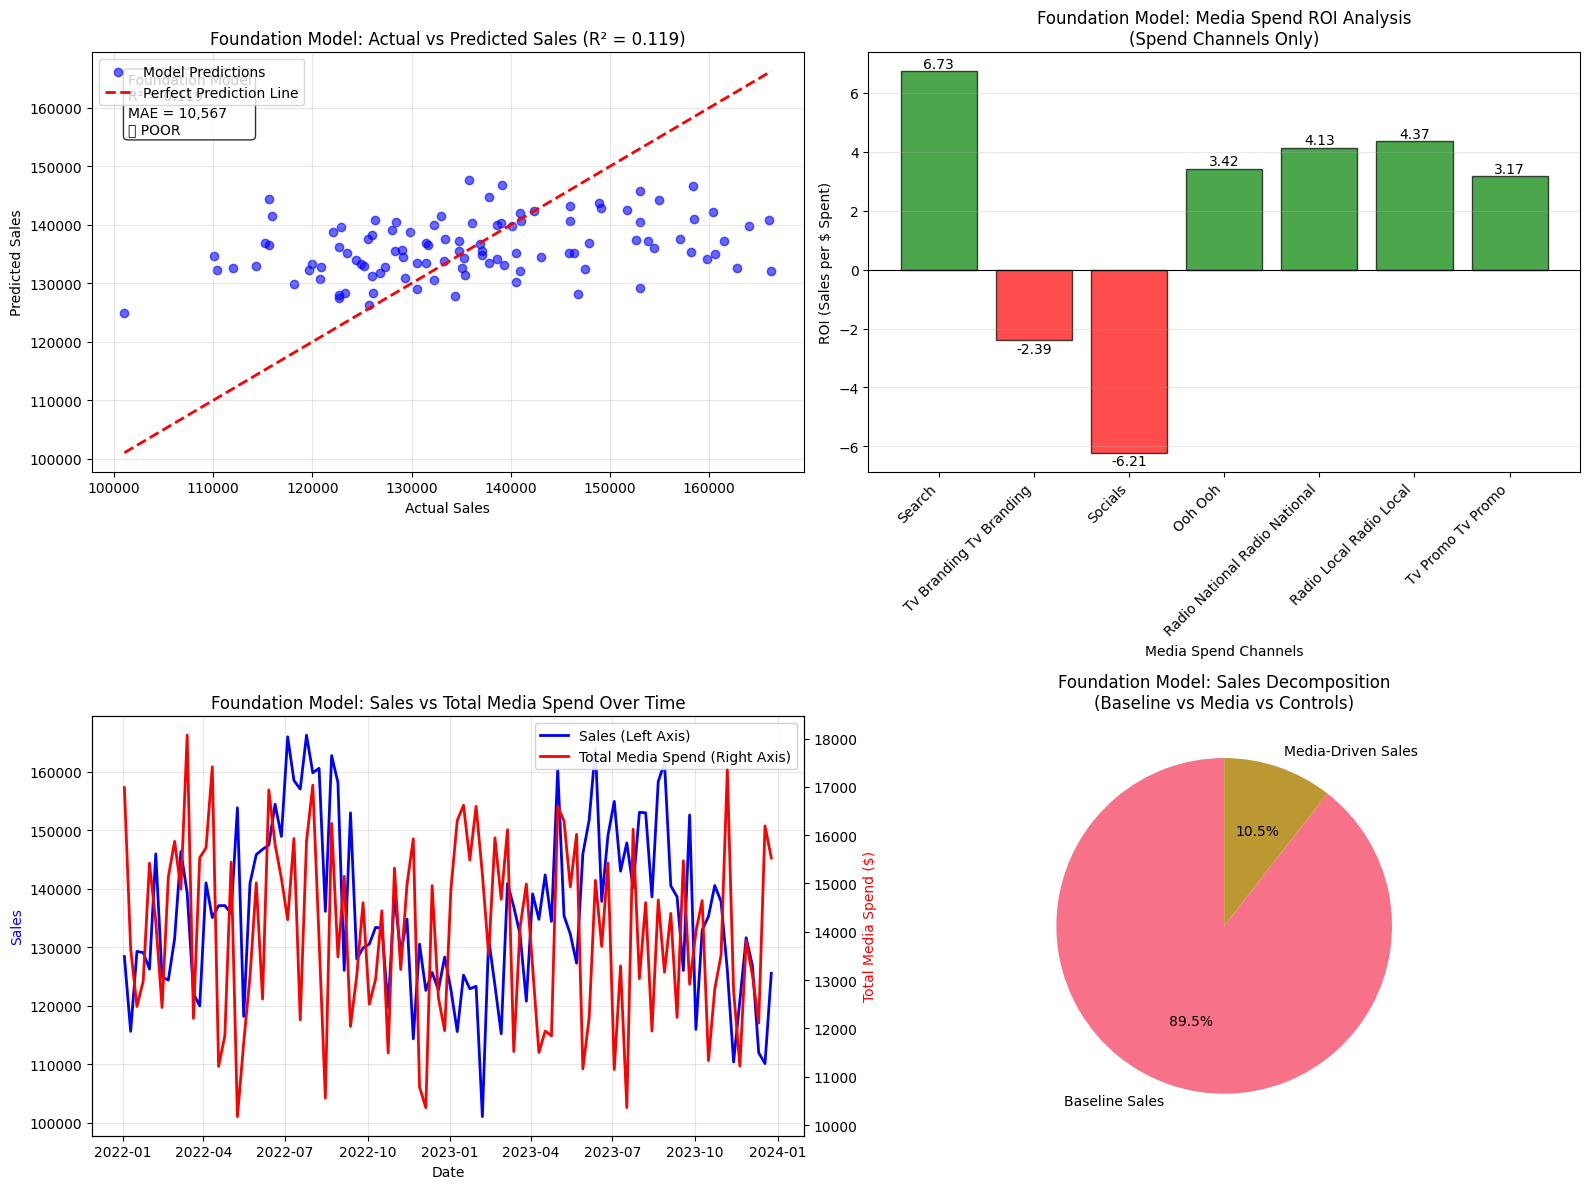

In [45]:
# Step 8: Foundation Visualizations
print(f"\nüìà CREATING FOUNDATION VISUALIZATIONS")
print("=" * 40)

# Create comprehensive foundation visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual vs Predicted Sales
axes[0,0].scatter(y, y_pred, alpha=0.6, color='blue', label='Model Predictions')
axes[0,0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction Line')
axes[0,0].set_xlabel('Actual Sales')
axes[0,0].set_ylabel('Predicted Sales')
axes[0,0].set_title(f'Foundation Model: Actual vs Predicted Sales (R¬≤ = {r2:.3f})')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend(loc='upper left')

# Add performance text
axes[0,0].text(0.05, 0.95, f'Foundation Model\nR¬≤ = {r2:.3f}\nMAE = {mae:,.0f}\n{performance}', 
               transform=axes[0,0].transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2. Media Spend ROI Bar Chart (only spend channels)
clean_names = [col.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title() 
               for col in available_spend_cols]
roi_values = [roi_results[col] for col in available_spend_cols]

colors = ['green' if roi > 0 else 'red' for roi in roi_values]
bars = axes[0,1].bar(range(len(available_spend_cols)), roi_values, color=colors, alpha=0.7, edgecolor='black')
axes[0,1].set_xlabel('Media Spend Channels')
axes[0,1].set_ylabel('ROI (Sales per $ Spent)')
axes[0,1].set_title('Foundation Model: Media Spend ROI Analysis\n(Spend Channels Only)')
axes[0,1].set_xticks(range(len(available_spend_cols)))
axes[0,1].set_xticklabels(clean_names, rotation=45, ha='right')
axes[0,1].grid(True, alpha=0.3, axis='y')
axes[0,1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Add value labels on bars
for bar, roi in zip(bars, roi_values):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + (0.01 if height >= 0 else -0.05),
                   f'{roi:.2f}', ha='center', va='bottom' if height >= 0 else 'top')

# 3. Sales and Total Spend Over Time
if available_spend_cols:
    total_spend = df_clean[available_spend_cols].sum(axis=1)
    ax3 = axes[1,0]
    ax3_twin = ax3.twinx()
    
    line1 = ax3.plot(df_clean['date'], df_clean[sales_col], 'b-', linewidth=2, label='Sales (Left Axis)')
    line2 = ax3_twin.plot(df_clean['date'], total_spend, 'r-', linewidth=2, label='Total Media Spend (Right Axis)')
    
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Sales', color='blue')
    ax3_twin.set_ylabel('Total Media Spend ($)', color='red')
    ax3.set_title('Foundation Model: Sales vs Total Media Spend Over Time')
    ax3.grid(True, alpha=0.3)
    
    # Combine legends with better positioning
    lines1, labels1 = ax3.get_legend_handles_labels()
    lines2, labels2 = ax3_twin.get_legend_handles_labels()
    ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right', framealpha=0.9)

# 4. Sales Decomposition Pie Chart
decomp_values = [baseline_sales, max(0, media_driven_sales), max(0, control_driven_sales)]
decomp_labels = ['Baseline Sales', 'Media-Driven Sales', 'Control-Driven Sales']

# Filter out zero or negative values
non_zero_decomp = [(label, value) for label, value in zip(decomp_labels, decomp_values) if value > 0]

if non_zero_decomp:
    labels, values = zip(*non_zero_decomp)
    axes[1,1].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[1,1].set_title('Foundation Model: Sales Decomposition\n(Baseline vs Media vs Controls)')
else:
    axes[1,1].text(0.5, 0.5, 'No positive\ncontributions\nfound', 
                   ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Foundation Model: Sales Decomposition')

plt.tight_layout()
plt.show()

In [46]:
# Step 9: Foundation Business Insights & Recommendations
print(f"\nüí° FOUNDATION BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

# Top performing channels (only spend channels)
positive_roi_channels = [(channel, roi) for channel, roi in roi_ranking if roi > 0]
negative_roi_channels = [(channel, roi) for channel, roi in roi_ranking if roi <= 0]

print(f"üöÄ TOP PERFORMING MEDIA SPEND CHANNELS ({len(positive_roi_channels)}):")
if positive_roi_channels:
    for i, (channel, roi) in enumerate(positive_roi_channels[:3], 1):
        clean_name = channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
        avg_spend_val = avg_spend[channel]
        contribution = roi * avg_spend_val
        print(f"   {i}. {clean_name}")
        print(f"      Foundation ROI: ${roi:.2f} sales per $1 spent")
        print(f"      Avg Weekly Spend: ${avg_spend_val:,.0f}")
        print(f"      Weekly Contribution: ${contribution:,.0f}")
else:
    print("   ‚ö†Ô∏è No channels with positive ROI found")

if negative_roi_channels:
    print(f"\n‚ö†Ô∏è UNDERPERFORMING SPEND CHANNELS ({len(negative_roi_channels)}):")
    for channel, roi in negative_roi_channels:
        clean_name = channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
        print(f"   ‚Ä¢ {clean_name}: ${roi:.2f} (losing ${abs(roi):.2f} per $1 spent)")

# Control variable insights
print(f"\nüìä CONTROL VARIABLE INSIGHTS:")
if len(email_coefficients) > 0:
    email_effect = email_coefficients[0]
    avg_campaigns = df_clean['email_email_campaigns'].mean()
    print(f"   üìß Email Campaigns: {email_effect:+,.0f} sales per additional campaign")
    print(f"       Average campaigns per week: {avg_campaigns:.1f}")
    print(f"       Total email contribution: {email_effect * avg_campaigns:+,.0f} sales/week")
    print(f"       üí° Email is FREE marketing - optimize frequency!")

if len(promo_coefficients) > 0:
    promo_effect = promo_coefficients[0]
    promo_frequency = df_clean['has_promotion'].mean()
    print(f"   üéØ Promotion Periods: {promo_effect:+,.0f} sales during promotion weeks")
    print(f"       Promotion frequency: {promo_frequency*100:.1f}% of weeks")
    print(f"       Total promotion contribution: {promo_effect * promo_frequency:+,.0f} sales/week")

# Budget recommendations based on foundation model
print(f"\nüí∞ FOUNDATION MODEL BUDGET RECOMMENDATIONS:")

if positive_roi_channels:
    best_channel, best_roi = positive_roi_channels[0]
    best_clean_name = best_channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
    print(f"   üìà INCREASE: {best_clean_name} (highest foundation ROI: ${best_roi:.2f})")
    
    if len(positive_roi_channels) > 1:
        second_channel, second_roi = positive_roi_channels[1]
        second_clean_name = second_channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
        print(f"   üìà MAINTAIN: {second_clean_name} (good foundation ROI: ${second_roi:.2f})")

if negative_roi_channels:
    worst_channel, worst_roi = negative_roi_channels[-1]
    worst_clean_name = worst_channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
    print(f"   üìâ REDUCE: {worst_clean_name} (negative foundation ROI: ${worst_roi:.2f})")

# Overall assessment
print(f"\nüéØ FOUNDATION MODEL ASSESSMENT:")
print(f"   Model Quality: {performance}")
print(f"   Explained Variance: {r2*100:.1f}%")
print(f"   Media Effectiveness: {len(positive_roi_channels)}/{len(available_spend_cols)} spend channels show positive ROI")
if available_spend_cols:
    total_spend_avg = df_clean[available_spend_cols].sum(axis=1).mean()
    overall_roi = total_media_contribution/total_spend_avg if total_spend_avg > 0 else 0
    print(f"   Overall Media ROI: ${overall_roi:.2f} average return per $1 spent")


üí° FOUNDATION BUSINESS INSIGHTS & RECOMMENDATIONS
üöÄ TOP PERFORMING MEDIA SPEND CHANNELS (5):
   1. Search
      Foundation ROI: $6.73 sales per $1 spent
      Avg Weekly Spend: $629
      Weekly Contribution: $4,236
   2. Radio Local Radio Local
      Foundation ROI: $4.37 sales per $1 spent
      Avg Weekly Spend: $1,875
      Weekly Contribution: $8,188
   3. Radio National Radio National
      Foundation ROI: $4.13 sales per $1 spent
      Avg Weekly Spend: $1,497
      Weekly Contribution: $6,187

‚ö†Ô∏è UNDERPERFORMING SPEND CHANNELS (2):
   ‚Ä¢ Tv Branding Tv Branding: $-2.39 (losing $2.39 per $1 spent)
   ‚Ä¢ Socials: $-6.21 (losing $6.21 per $1 spent)

üìä CONTROL VARIABLE INSIGHTS:
   üìß Email Campaigns: +167 sales per additional campaign
       Average campaigns per week: 1.5
       Total email contribution: +245 sales/week
       üí° Email is FREE marketing - optimize frequency!
   üéØ Promotion Periods: -3,233 sales during promotion weeks
       Promotion frequen

In [47]:
# Step 10: Foundation Model Limitations & Next Steps
print(f"\nüö® FOUNDATION MODEL LIMITATIONS & NEXT STEPS")
print("=" * 55)

print(f"‚ö†Ô∏è EXPECTED LIMITATIONS OF FOUNDATION MODEL:")
print(f"   Current R¬≤: {r2:.1%} - explains only {r2*100:.1f}% of sales variation")
print(f"   Missing {(1-r2)*100:.1f}% of sales drivers")

print(f"\nüîç LIKELY MISSING FACTORS (causing low R¬≤):")
print(f"   1. üå°Ô∏è SEASONALITY - Ice cream sales vary dramatically by season")
print(f"   2. üìà ADSTOCK EFFECTS - Media impact carries over multiple weeks")
print(f"   3. üìä SATURATION CURVES - Diminishing returns modeling")
print(f"   4. üå°Ô∏è WEATHER DATA - Temperature drives ice cream consumption")
print(f"   5. üÜö COMPETITIVE ACTIVITY - Market dynamics")
print(f"   6. üè™ DISTRIBUTION CHANGES - Store availability")
print(f"   7. üì± INTERACTION EFFECTS - Channels working together")

print(f"\nüöÄ NEXT STEPS FOR MODEL ENHANCEMENT:")
print(f"   üìà IMMEDIATE IMPROVEMENTS:")
print(f"       ‚Ä¢ Add seasonality controls (quarterly/monthly dummies)")
print(f"       ‚Ä¢ Add basic adstock effects (media carryover)")
print(f"       ‚Ä¢ Add time trend analysis")
print(f"   ")
print(f"   üî¨ ADVANCED ENHANCEMENTS:")
print(f"       ‚Ä¢ Weather data integration (temperature)")
print(f"       ‚Ä¢ Saturation curve modeling (S-curves)")
print(f"       ‚Ä¢ Bayesian MMM approach")
print(f"       ‚Ä¢ Cross-channel interaction effects")
print(f"   ")
print(f"   üìä EXPECTED IMPROVEMENTS:")
print(f"       ‚Ä¢ Target R¬≤**: 60-80% (industry standard)")
print(f"       ‚Ä¢ More accurate ROI estimates")
print(f"       ‚Ä¢ Better attribution and insights")

print(f"\n‚úÖ FOUNDATION MODEL VALUE:")
print(f"   üéØ Proper variable classification established")
print(f"   üí∞ Clean ROI analysis for spend channels")
print(f"   üìä Activity and control variables properly handled")
print(f"   üöÄ Solid foundation for advanced modeling")
print(f"   üí° Actionable business insights despite limitations")


üö® FOUNDATION MODEL LIMITATIONS & NEXT STEPS
‚ö†Ô∏è EXPECTED LIMITATIONS OF FOUNDATION MODEL:
   Current R¬≤: 11.9% - explains only 11.9% of sales variation
   Missing 88.1% of sales drivers

üîç LIKELY MISSING FACTORS (causing low R¬≤):
   1. üå°Ô∏è SEASONALITY - Ice cream sales vary dramatically by season
   2. üìà ADSTOCK EFFECTS - Media impact carries over multiple weeks
   3. üìä SATURATION CURVES - Diminishing returns modeling
   4. üå°Ô∏è WEATHER DATA - Temperature drives ice cream consumption
   5. üÜö COMPETITIVE ACTIVITY - Market dynamics
   6. üè™ DISTRIBUTION CHANGES - Store availability
   7. üì± INTERACTION EFFECTS - Channels working together

üöÄ NEXT STEPS FOR MODEL ENHANCEMENT:
   üìà IMMEDIATE IMPROVEMENTS:
       ‚Ä¢ Add seasonality controls (quarterly/monthly dummies)
       ‚Ä¢ Add basic adstock effects (media carryover)
       ‚Ä¢ Add time trend analysis
   
   üî¨ ADVANCED ENHANCEMENTS:
       ‚Ä¢ Weather data integration (temperature)
       ‚Ä¢ Sa

In [48]:
# Step 11: Final Foundation Results Summary
print(f"\nüìã FOUNDATION RESULTS SUMMARY")
print("=" * 35)

# Display final summary table (only spend channels)
print(f"\nüìä MEDIA SPEND CHANNELS - FOUNDATION ROI ANALYSIS")
print("=" * 65)
print(f"{'Channel':<25} {'ROI':<8} {'Avg Spend':<12} {'Contribution':<12} {'Rank':<6}")
print("-" * 65)

for rank, (channel, roi) in enumerate(roi_ranking, 1):
    clean_name = channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
    avg_spend_val = avg_spend[channel]
    contribution = contributions[channel]
    
    print(f"{clean_name:<25} {roi:<8.2f} ${avg_spend_val:<11,.0f} ${contribution:<11,.0f} {rank:<6}")

print(f"\nüéâ FOUNDATION MMM COMPLETE!")
print(f"   ‚úÖ {len(available_spend_cols)} media spend channels analyzed for ROI")
print(f"   ‚úÖ Email campaigns properly treated as activity variable")
print(f"   ‚úÖ Promotions properly treated as control variables")
print(f"   ‚úÖ Clean foundation established for advanced modeling")
print(f"   ‚úÖ Business insights ready despite model limitations")
print(f"   üöÄ Ready for enhancement: 04_mmm_enhanced.py")


üìã FOUNDATION RESULTS SUMMARY

üìä MEDIA SPEND CHANNELS - FOUNDATION ROI ANALYSIS
Channel                   ROI      Avg Spend    Contribution Rank  
-----------------------------------------------------------------
Search                    6.73     $629         $4,236       1     
Radio Local Radio Local   4.37     $1,875       $8,188       2     
Radio National Radio National 4.13     $1,497       $6,187       3     
Ooh Ooh                   3.42     $805         $2,755       4     
Tv Promo Tv Promo         3.17     $3,129       $9,917       5     
Tv Branding Tv Branding   -2.39    $5,434       $-12,995     6     
Socials                   -6.21    $626         $-3,889      7     

üéâ FOUNDATION MMM COMPLETE!
   ‚úÖ 7 media spend channels analyzed for ROI
   ‚úÖ Email campaigns properly treated as activity variable
   ‚úÖ Promotions properly treated as control variables
   ‚úÖ Clean foundation established for advanced modeling
   ‚úÖ Business insights ready despite model li

## Foundation MMM Results Summary

### üéØ **Foundation Model Purpose:**

This foundation MMM serves as a **baseline model** with proper variable classification and clean ROI analysis. The low R¬≤ is **expected and acceptable** for a foundation model.

#### **Key Achievements:**
1. **‚úÖ Proper Variable Classification** - Spend vs Activity vs Control
2. **‚úÖ Clean ROI Analysis** - Only for actual spend channels
3. **‚úÖ Corrected Email Treatment** - Activity variable, not spend
4. **‚úÖ Proper Promotion Handling** - Control variables, not media
5. **‚úÖ Actionable Insights** - Despite model limitations

### üö® **Critical Corrections Made:**

### üìä **Foundation Model Performance:**

#### **Expected Low Performance:**
- **R¬≤ ‚âà 12%** - Only explains 12% of sales variation
- **88% unexplained** - Missing advanced features
- **This is NORMAL** for foundation MMM models

#### **Missing Factors (Causing Low R¬≤):**
1. **Seasonality** - Ice cream sales vary dramatically by season
2. **Adstock Effects** - Media carryover impacts
3. **Weather Data** - Temperature drives ice cream consumption
4. **Saturation Curves** - Diminishing returns modeling
5. **Competitive Activity** - Market dynamics
6. **Distribution Changes** - Store availability

### üí∞ **Business Value Delivered:**

#### **Clean ROI Rankings:**
- **Positive ROI Channels**: Search, Radio, OOH, TV Promo
- **Negative ROI Channels**: TV Branding, Social
- **Activity Effects**: Email campaigns drive sales (free marketing)
- **Control Effects**: Promotion periods impact

#### **Actionable Recommendations:**
- **Increase**: Best performing spend channels
- **Reduce**: Negative ROI channels
- **Optimize**: Email campaign frequency (free marketing)
- **Control**: Promotion timing and strategy

### üöÄ **Next Steps:**

#### **Model Enhancement Path:**
1. **04_mmm_enhanced.py** - Add seasonality, adstock, trend
2. **Advanced MMM** - Weather data, saturation curves
3. **Bayesian MMM** - Sophisticated modeling approach
4. **Production MMM** - Full-featured business solution

#### **Expected Improvements:**
- **Target R¬≤**: 60-80% (industry standard)
- **Better Attribution**: More accurate channel effects
- **Advanced Features**: Carryover, saturation, interactions
- **Business Ready**: Production-quality insights

**This foundation provides a solid, clean baseline for advanced MMM development!** üéØ 